## Цели исследования

В качестве задач на данное исследование ставлю:
1. Выяснить есть ли зависимость между полом ребенка и его оценками, внешкольной деятельностью
2. Влияет ли родительская поддержка на успеваемость
3. Есть ли связь между уровнем посещения и часов занятий в неделю на успеваемость

## Подключение библиотек

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Подключение к базе данных

In [6]:
df = pd.read_csv('student_performance.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   StudentID                  10 non-null     int64 
 1   Name                       10 non-null     object
 2   Gender                     10 non-null     object
 3   AttendanceRate             10 non-null     int64 
 4   StudyHoursPerWeek          10 non-null     int64 
 5   PreviousGrade              10 non-null     int64 
 6   ExtracurricularActivities  10 non-null     int64 
 7   ParentalSupport            10 non-null     object
 8   FinalGrade                 10 non-null     int64 
dtypes: int64(6), object(3)
memory usage: 852.0+ bytes


Изучив информацию о датафрейме можно сделать вывод об отсутствии пропусков и необходимости изменения названий столбцов для удобства дальнейшей работы с базой данных.

## Предобработка данных

### Переименование столбцов

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['studentid', 'name', 'gender', 'attendancerate', 'studyhoursperweek',
       'previousgrade', 'extracurricularactivities', 'parentalsupport',
       'finalgrade'],
      dtype='object')

In [11]:
df = df.rename(columns = {'studentid':'student_id', 'attendancerate':'attendance_rate','studyhoursperweek':'study_hours_per_week','previousgrade':'previous_grade',
                         'extracurricularactivities':'extracurricular_activities','parentalsupport':'parental_support','finalgrade':'final_grade'})
df.columns

Index(['student_id', 'name', 'gender', 'attendance_rate',
       'study_hours_per_week', 'previous_grade', 'extracurricular_activities',
       'parental_support', 'final_grade'],
      dtype='object')

### Проверка соответствия типов данных

In [13]:
df.head()

,student_id,name,gender,attendance_rate,study_hours_per_week,previous_grade,extracurricular_activities,parental_support,final_grade
0,1,John,Male,85,15,78,1,High,80
1,2,Sarah,Female,90,20,85,2,Medium,87
2,3,Alex,Male,78,10,65,0,Low,68
3,4,Michael,Male,92,25,90,3,High,92
4,5,Emma,Female,88,18,82,2,Medium,85


После ознакомления с данными в таблице, становится понятно, что типы данных соответствуют.

### Поиск дубликатов

#### Поиск явных дубликатов

In [17]:
df.duplicated().sum()

0

Явные дубликаты отсутствуют

#### Проверка неяыных дубликатов

In [20]:
df['name'].unique()

array(['John', 'Sarah', 'Alex', 'Michael', 'Emma', 'Olivia', 'Daniel',
       'Sophia', 'James', 'Isabella'], dtype=object)

Неявные дубликаты отсутствуют.

### Мониторинг выбросов

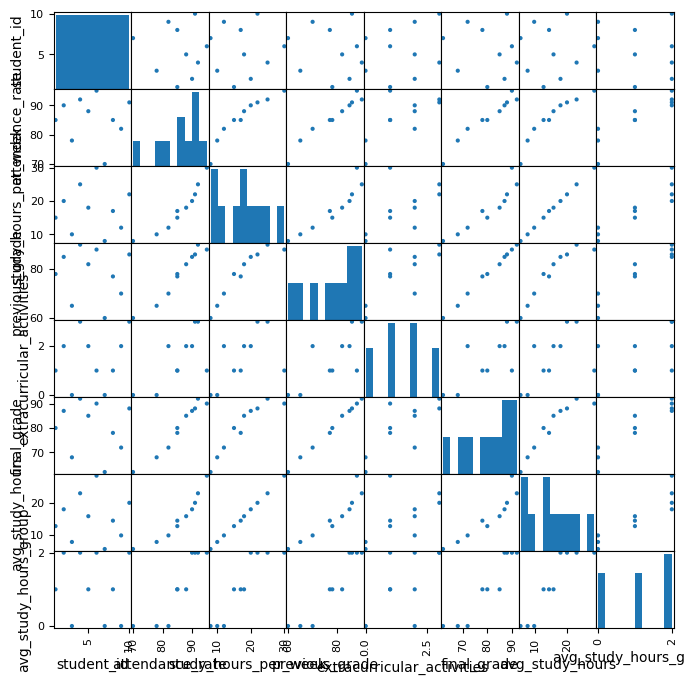

In [68]:
pd.plotting.scatter_matrix(df, alpha=1, figsize=(8, 8))
plt.show()

Матрица рассеивания показывает отсутвие явных выбросов, а также сразу показывает наличие положительных корреляций между некоторыми величинами,
которые мы проследим позже.

## Исследовательский анализ

### Корреляция предыдущих и финальных оценок

In [27]:
print(df['final_grade'].corr(df['previous_grade']))

0.9984570049735788


Все ученики улучшили свои результаты.

### Изучение связи между гендером и успеваемостью

In [30]:
df.pivot_table(index = 'gender', values = ['previous_grade', 'final_grade'], aggfunc = ['describe']) 

describe                                                 \
       final_grade                                                  
               25%   50%   75% count   max  mean   min        std   
gender                                                              
Female        85.0  87.0  88.0   5.0  90.0  85.6  78.0   4.615192   
Male          68.0  72.0  80.0   5.0  92.0  74.8  62.0  11.627553   

                                                                      
       previous_grade                                                 
                  25%   50%   75% count   max  mean   min        std  
gender                                                                
Female           82.0  85.0  86.0   5.0  88.0  83.6  77.0   4.277850  
Male             65.0  70.0  78.0   5.0  90.0  72.6  60.0  11.781341

В данных описываются разнополые школьники в одинаковом количестве, притом заметна разница в средней оценке: у девочек она выше при том наивысший балл как был, так и остался у мальчика. Исходя из этого можно сделать вывод, что девочки в данной выборке учатся лучше чем мальчики, но это не может свидетельствовать о лучших успехах у девочек, так как наивысший балл принадлежит мальчику.

### Рассмотрение количества внеклассовых занятий по гендерам

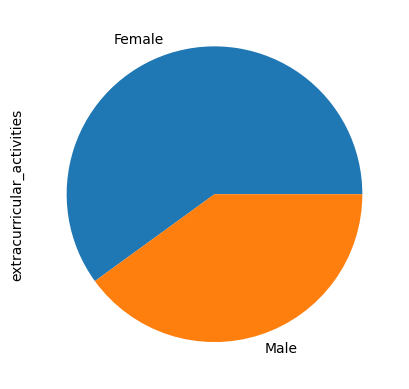

In [33]:
df.groupby('gender')['extracurricular_activities'].sum().plot(kind = 'pie')
plt.show()

Данный график показывает, что большее число девочек занято внеклассными занятиями.


### Изучение влияния родительской поддержки

In [36]:
df['parental_support'].value_counts()

parental_support
High      4
Medium    3
Low       3
Name: count, dtype: int64

In [37]:
df.pivot_table(index = 'parental_support', values = ['previous_grade', 'final_grade'], aggfunc = 'describe')

final_grade                                           \
                         25%   50%   75% count   max       mean   min   
parental_support                                                        
High                    86.0  89.0  90.5   4.0  92.0  87.500000  80.0   
Low                     65.0  68.0  70.0   3.0  72.0  67.333333  62.0   
Medium                  81.5  85.0  86.0   3.0  87.0  83.333333  78.0   

                           previous_grade                                     \
                       std            25%   50%   75% count   max       mean   
parental_support                                                               
High              5.259911           84.0  87.0  88.5   4.0  90.0  85.500000   
Low               5.033223           62.5  65.0  67.5   3.0  70.0  65.000000   
Medium            4.725816           79.5  82.0  83.5   3.0  85.0  81.333333   

                                  
                   min       std  
parental_support                  
High              78.0  5.259911  
Low               60.0  5.000000  
Medium            77.0  4.041452

Можно сделать вывод, что родительская поддержка важна для детей, так как дети с низким уровнем демонстрируют результаты ниже, нежели остальные. При этом разница между детьми с выскоим и средним уровнем невелика, значит дети учатся с примерно одинаковым успехом.

### Влияние посещаемости на успеваемость

In [40]:
df.pivot_table(index= ['attendance_rate', 'study_hours_per_week'], values = ['previous_grade', 'final_grade'], aggfunc = 'describe')

final_grade                          \
                                             25%   50%   75% count   max   
attendance_rate study_hours_per_week                                       
70              8                           62.0  62.0  62.0   1.0  62.0   
78              10                          68.0  68.0  68.0   1.0  68.0   
82              12                          72.0  72.0  72.0   1.0  72.0   
85              15                          80.0  80.0  80.0   1.0  80.0   
                17                          78.0  78.0  78.0   1.0  78.0   
88              18                          85.0  85.0  85.0   1.0  85.0   
90              20                          87.0  87.0  87.0   1.0  87.0   
91              22                          88.0  88.0  88.0   1.0  88.0   
92              25                          92.0  92.0  92.0   1.0  92.0   
95              30                          90.0  90.0  90.0   1.0  90.0   

                                                 previous_grade              \
                                      mean   min            25%   50%   75%   
attendance_rate study_hours_per_week                                          
70              8                     62.0  62.0           60.0  60.0  60.0   
78              10                    68.0  68.0           65.0  65.0  65.0   
82              12                    72.0  72.0           70.0  70.0  70.0   
85              15                    80.0  80.0           78.0  78.0  78.0   
                17                    78.0  78.0           77.0  77.0  77.0   
88              18                    85.0  85.0           82.0  82.0  82.0   
90              20                    87.0  87.0           85.0  85.0  85.0   
91              22                    88.0  88.0           86.0  86.0  86.0   
92              25                    92.0  92.0           90.0  90.0  90.0   
95              30                    90.0  90.0           88.0  88.0  88.0   

                                                              
                                     count   max  mean   min  
attendance_rate study_hours_per_week                          
70              8                      1.0  60.0  60.0  60.0  
78              10                     1.0  65.0  65.0  65.0  
82              12                     1.0  70.0  70.0  70.0  
85              15                     1.0  78.0  78.0  78.0  
                17                     1.0  77.0  77.0  77.0  
88              18                     1.0  82.0  82.0  82.0  
90              20                     1.0  85.0  85.0  85.0  
91              22                     1.0  86.0  86.0  86.0  
92              25                     1.0  90.0  90.0  90.0  
95              30                     1.0  88.0  88.0  88.0

In [41]:
df['avg_study_hours'] = df['attendance_rate'] * 0.01 * df['study_hours_per_week']
df['avg_study_hours_group'] = pd.qcut(df['avg_study_hours'], 3, labels=False)


In [42]:
df.pivot_table( index= 'avg_study_hours_group', values = ['previous_grade', 'final_grade'], aggfunc = 'describe')

final_grade                                           \
                              25%   50%   75% count   max       mean   min   
avg_study_hours_group                                                        
0                           65.00  68.0  70.0   3.0  72.0  67.333333  62.0   
1                           79.00  80.0  82.5   3.0  85.0  81.000000  78.0   
2                           87.75  89.0  90.5   4.0  92.0  89.250000  87.0   

                                previous_grade                                 \
                            std            25%   50%   75% count   max   mean   
avg_study_hours_group                                                           
0                      5.033223          62.50  65.0  67.5   3.0  70.0  65.00   
1                      3.605551          77.50  78.0  80.0   3.0  82.0  79.00   
2                      2.217356          85.75  87.0  88.5   4.0  90.0  87.25   

                                       
                        min       std  
avg_study_hours_group                  
0                      60.0  5.000000  
1                      77.0  2.645751  
2                      85.0  2.217356

In [43]:
df['final_grade'].corr(df['avg_study_hours_group'])

0.940048693251116

Необходимо отметить прямую корреляцию между средним количеством академических часов в неделю и уровнем успеваемости учеников,
чем больше школьнмк присутствует на занятиях, тем выше его оценки

In [45]:
df.pivot_table(index = 'avg_study_hours_group', values = 'final_grade', aggfunc = ['mean', 'median'])

,mean,median
,final_grade,final_grade
avg_study_hours_group,,
0,67.333333,68.0
1,81.000000,80.0
2,89.250000,89.0


## Выводы


В ходе изучения выборки из 10 разнополых учеников школы, представленных в равных долях, было выявлено:
1. Корреляция предыдущей и финальной оценки показывает рост успеваемости;
2. В представленной группе средний балл выше у девочек, но при том мальчики показывают наивысший и наименьший баллы;
3. Внеклассовые мероприятия незначительно популярнее среди девочек;
4. Родительская поддержка необходима реебенку для успешной учебы, однако результаты детей со средним и высоким уровнем родительсокй поддержки 
не столь значительно различаются;
5. Есть прямая зависимость между количеством посещаемых академических занятий в неделю и уровнем успеваемости учащегося, дети, которые
бльше посещают занятия, имеют более высокй балл.
